# Data Cleaning with Pandas

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [3]:
df.shape

(9, 7)

In [4]:
# kita mau deteksi data hilang - dengan teknik otomatis Pandas
# pertama, kita perhatikan kolom ST_NUM dulu
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [5]:
# isnull() adalah built-in function Pandas untuk cek data yang hilang
df['ST_NUM'].isnull() # kita sudah membuat data baru yang isinya True atau False saja

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [6]:
# berikutnya, kita perlu beritahu Pandas data yang artinya sama dengan NaN (data hilang)
missing_values = ["n/a", "NA", "--", "na"]
# baca ulang data, sambil kasih tau Pandas, kalau data di list atas itu adalah NaN (data hilang)
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv", na_values = missing_values)
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [7]:
df['NUM_BEDROOMS'].isnull() # bisa gunakan isnull() lagi untuk buat kolom khusus True/False ada missing data

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

In [8]:
# tipe ketiga adalah UNEXPECTED missing data
# misalkan tipe data yang harusnya angka, tiba-tiba ada string, atau sebaliknya
df['NUM_BATH']

0         1
1       1.5
2         1
3       NaN
4         2
5         1
6    HURLEY
7         1
8         2
Name: NUM_BATH, dtype: object

In [14]:
counter = 0 # hitung jumlah row
for row in df['NUM_BATH']:
    try:
        float(row) # kalau berhasil convert ke float, datanya aman
    except ValueError:
        df.loc[counter, 'NUM_BATH'] = np.nan
    counter += 1
    
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [18]:
counter = 0 # hitung jumlah row
for row in df['OWN_OCCUPIED']:
    try:
        int(row) # kalau berhasil convert ke integer, berarti datanya tipe angka
        df.loc[counter, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    finally:
        counter += 1
    
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [17]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [19]:
df['NUM_BATH'].isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: NUM_BATH, dtype: bool

## Summarize missing values

In [20]:
df['NUM_BATH'].isnull().sum()

2

In [21]:
df['OWN_OCCUPIED'].isnull().sum()

2

In [22]:
df.isnull().sum() # melihat keseluruhan data kita, per kolomnya ada berapa missing data

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        2
SQ_FT           2
dtype: int64

In [25]:
# apakah ada missing data per kolom dataframe kita?
df.isnull().any()

PID              True
ST_NUM           True
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS     True
NUM_BATH         True
SQ_FT            True
dtype: bool

In [26]:
# di dataframe kita apakah ada missing data?
df.isnull().values.any()

True

## Replace missing value
data yang hilang itu bisa kita isi 
- apakah mau diisi satu data, contohnya ST_NUM yang missing kita isi 125
- atau mau diisi median datanya,
- atau rata-rata data sekitarnya,
- atau lainnya

In [29]:
df['ST_NUM'].fillna(125, inplace=True) # diganti dengan 1 data spesifik

In [30]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [31]:
df.isnull().any()

PID              True
ST_NUM          False
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS     True
NUM_BATH         True
SQ_FT            True
dtype: bool

In [32]:
# diganti dengan median
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [33]:
df.isnull().any()

PID              True
ST_NUM          False
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS    False
NUM_BATH         True
SQ_FT            True
dtype: bool

## Contoh lain - data Obesitas

In [36]:
raw_data = pd.ExcelFile('data/obes.xls')

In [37]:
raw_data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [39]:
data_age = raw_data.parse(u'7.2', skiprows=4, skipfooter=14)
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [42]:
# ubah nama kolom, jangan lupa gunakan opsi inplace untuk merubah data awal
data_age.rename(columns={'Unnamed: 0': 'Year'}, inplace=True) 

In [43]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [44]:
# hapus row yang isinya kosong
data_age.dropna(inplace = True)
data_age.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [45]:
# kita gunakan column "Year" sebagai column index
# agar index kita lebih informatif
data_age.set_index('Year', inplace=True)
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [47]:
data_age.loc['2011/12']

Total          11736.0
Under 16         495.0
16-24            391.0
25-34           1484.0
35-44           3104.0
45-54           3581.0
55-64           2119.0
65-74            468.0
75 and over       94.0
Name: 2011/12, dtype: float64

<AxesSubplot:xlabel='Year'>

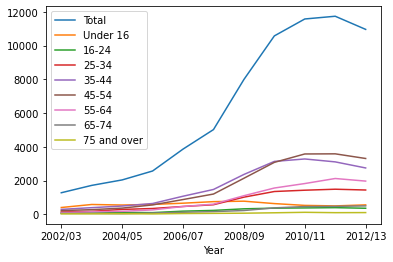

In [48]:
data_age.plot()

In [50]:
# cara hapus kolom total agar tidak mengganggu kita baca data plot
data_age_tanpa_total = data_age.drop('Total', axis=1)

<AxesSubplot:xlabel='Year'>

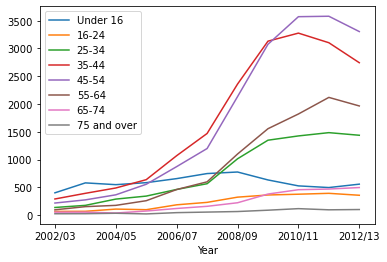

In [51]:
data_age_tanpa_total.plot()

<AxesSubplot:xlabel='Year'>

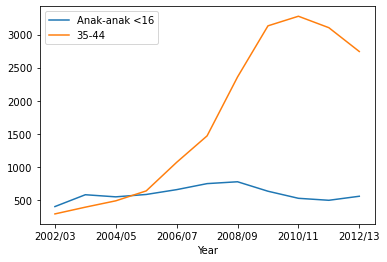

In [56]:
# disini kita meng analisa data, sesuai pertanyaan awal, lalu menarik kesimpulan
data_age['Under 16'].plot(label="Anak-anak <16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

menarik kesimpulan: dari data obesitas yang diberikan, kelihatan kalau anak-anak <16 tahun tidak bertambah obes.

# Time Series

In [57]:
from datetime import datetime

In [58]:
range(2,11,2)

range(2, 11, 2)

In [59]:
# membuat range bentuk tanggal
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [61]:
pd.date_range('1/01/2020', '1/08/2020', freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [66]:
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100, size=len(date_rng))
df

,date,data
0,2020-01-01 00:00:00,67
1,2020-01-01 01:00:00,97
2,2020-01-01 02:00:00,16
3,2020-01-01 03:00:00,1
4,2020-01-01 04:00:00,73
...,...,...
164,2020-01-07 20:00:00,8
165,2020-01-07 21:00:00,55
166,2020-01-07 22:00:00,23
167,2020-01-07 23:00:00,97


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    169 non-null    datetime64[ns]
 1   data    169 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.1 KB


In [68]:
# misalnya data kita belum bertime datetime, kita bisa convert tipe datanya ke datetime dengan .to_datetime()
df['datetime'] = pd.to_datetime(df['date'])
df

,date,data,datetime
0,2020-01-01 00:00:00,67,2020-01-01 00:00:00
1,2020-01-01 01:00:00,97,2020-01-01 01:00:00
2,2020-01-01 02:00:00,16,2020-01-01 02:00:00
3,2020-01-01 03:00:00,1,2020-01-01 03:00:00
4,2020-01-01 04:00:00,73,2020-01-01 04:00:00
...,...,...,...
164,2020-01-07 20:00:00,8,2020-01-07 20:00:00
165,2020-01-07 21:00:00,55,2020-01-07 21:00:00
166,2020-01-07 22:00:00,23,2020-01-07 22:00:00
167,2020-01-07 23:00:00,97,2020-01-07 23:00:00


In [69]:
# mempermudah kita, ubah index nya menjadi kolom date
df = df.set_index('datetime')
df

,date,data
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,67
2020-01-01 01:00:00,2020-01-01 01:00:00,97
2020-01-01 02:00:00,2020-01-01 02:00:00,16
2020-01-01 03:00:00,2020-01-01 03:00:00,1
2020-01-01 04:00:00,2020-01-01 04:00:00,73
...,...,...
2020-01-07 20:00:00,2020-01-07 20:00:00,8
2020-01-07 21:00:00,2020-01-07 21:00:00,55
2020-01-07 22:00:00,2020-01-07 22:00:00,23


In [70]:
df.drop(['date'], axis=1, inplace=True)
df

,data
datetime,
2020-01-01 00:00:00,67
2020-01-01 01:00:00,97
2020-01-01 02:00:00,16
2020-01-01 03:00:00,1
2020-01-01 04:00:00,73
...,...
2020-01-07 20:00:00,8
2020-01-07 21:00:00,55
2020-01-07 22:00:00,23


In [71]:
# ubah string jadi datetime
str_date = ['June-01-2020', 'June-02-2020', 'June-03-2020']
timestamp = [datetime.strptime(date,'%B-%d-%Y') for date in str_date]
timestamp

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [75]:
# ubah datetime jadi string
str_date = [str(date) for date in df.index]
str_date

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [81]:
# mengambil data spesifik per tanggal dari dataframe kita tadi
df['2020-01-05'] # tahun-bulan-tanggal, kita bisa ambil data untuk tanggal spesifik
# isinya ada 24 karena kita tadi buat datanya per jam

,data
datetime,
2020-01-05 00:00:00,28
2020-01-05 01:00:00,40
2020-01-05 02:00:00,27
2020-01-05 03:00:00,24
2020-01-05 04:00:00,26
2020-01-05 05:00:00,34
2020-01-05 06:00:00,2
2020-01-05 07:00:00,73
2020-01-05 08:00:00,74


In [82]:
df['2020-01-05'].shape

(24, 1)

In [84]:
# ambil range datetime
df['2020-01-04':'2020-01-06']

,data
datetime,
2020-01-04 00:00:00,60
2020-01-04 01:00:00,43
2020-01-04 02:00:00,45
2020-01-04 03:00:00,4
2020-01-04 04:00:00,96
...,...
2020-01-06 19:00:00,89
2020-01-06 20:00:00,22
2020-01-06 21:00:00,27


In [85]:
df['2020-01-04 09:00:00':'2020-01-04 21:00:00']

,data
datetime,
2020-01-04 09:00:00,58
2020-01-04 10:00:00,39
2020-01-04 11:00:00,37
2020-01-04 12:00:00,80
2020-01-04 13:00:00,35
2020-01-04 14:00:00,3
2020-01-04 15:00:00,3
2020-01-04 16:00:00,56
2020-01-04 17:00:00,83


In [86]:
# menggunakan datetime sebagai index lebih mempermudah dibanding
# menggunakan string biasa sebagai index

In [88]:
# kita juga bisa pakai resample untuk mengubah jumlah datanya, misalnya per hari bukan per jam
# cara rangkum datanya apakah mau di min, max, mean (rata2), sum, atau lainnya?
df.resample('D').sum()

,data
datetime,
2020-01-01,1208
2020-01-02,1457
2020-01-03,1302
2020-01-04,1144
2020-01-05,882
2020-01-06,1325
2020-01-07,1098
2020-01-08,24


In [91]:
# juga bisa buat yang lebih menarik lagi seperti rolling sum
# contohnya melihat total customer 3 hari terakhir
df.resample('D').sum().rolling(3).sum()

,data
datetime,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,3967.0
2020-01-04,3903.0
2020-01-05,3328.0
2020-01-06,3351.0
2020-01-07,3305.0
2020-01-08,2447.0


In [92]:
# contohnya melihat total customer 3 jam terakhir
df.rolling(3).sum()

,data
datetime,
2020-01-01 00:00:00,NaN
2020-01-01 01:00:00,NaN
2020-01-01 02:00:00,180.0
2020-01-01 03:00:00,114.0
2020-01-01 04:00:00,90.0
...,...
2020-01-07 20:00:00,147.0
2020-01-07 21:00:00,126.0
2020-01-07 22:00:00,86.0


In [93]:
df['rolling_sum_3jam'] = df.rolling(3).sum()
df

,data,rolling_sum_3jam
datetime,,
2020-01-01 00:00:00,67,NaN
2020-01-01 01:00:00,97,NaN
2020-01-01 02:00:00,16,180.0
2020-01-01 03:00:00,1,114.0
2020-01-01 04:00:00,73,90.0
...,...,...
2020-01-07 20:00:00,8,147.0
2020-01-07 21:00:00,55,126.0
2020-01-07 22:00:00,23,86.0


In [94]:
# metode lain fillna bisa dilihat di sini juga https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
df['rolling_sum_3jam'] = df['rolling_sum_3jam'].fillna(method='backfill')
df

,data,rolling_sum_3jam
datetime,,
2020-01-01 00:00:00,67,180.0
2020-01-01 01:00:00,97,180.0
2020-01-01 02:00:00,16,180.0
2020-01-01 03:00:00,1,114.0
2020-01-01 04:00:00,73,90.0
...,...,...
2020-01-07 20:00:00,8,147.0
2020-01-07 21:00:00,55,126.0
2020-01-07 22:00:00,23,86.0


# Menggunakan datetime index di data asli

In [96]:
opsd_daily = pd.read_csv('data/opsd_germany_daily.csv')

In [97]:
opsd_daily.shape

(4383, 5)

In [98]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [99]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [101]:
opsd_daily.set_index('Date', inplace=True)
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [103]:
opsd_daily.index # tipe data nya masih object bukan datetime
# boleh ubah index nya jadi tipe data datetime, pakai loop, atau kita pakai shortcut parse_dates saat baca datanya

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [104]:
opsd_daily = pd.read_csv('data/opsd_germany_daily.csv', index_col=0, parse_dates=True)
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [106]:
# kita mau lihat trend pemakaian listrik dari tahun ke tahun, dari per bulannya, 
# dan per minggu apakah ada hari tertentu yang berbeda
# jadi, kita buat kolom baru untuk tahun, bulan, dan hari (per minggu)
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [107]:
# melihat pemakaian listrik di tahun tertentu
opsd_daily.loc['2012']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,2012,1,6
2012-01-02,1269.581,207.327,6.574,213.901,2012,1,0
2012-01-03,1334.745,473.468,24.679,498.147,2012,1,1
2012-01-04,1347.136,499.804,14.681,514.485,2012,1,2
2012-01-05,1376.658,523.851,5.071,528.922,2012,1,3
...,...,...,...,...,...,...,...
2012-12-27,1068.617,302.195,13.111,315.306,2012,12,3
2012-12-28,1109.424,152.562,24.007,176.569,2012,12,4
2012-12-29,1014.550,294.502,38.122,332.624,2012,12,5


In [108]:
# melihat pemakaian listrik di tahun jan-mar tahun 2015
opsd_daily.loc['2015-01':'2015-03']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2015-01-01,1111.336,325.128,17.079,342.207,2015,1,3
2015-01-02,1300.884,603.558,7.758,611.316,2015,1,4
2015-01-03,1265.271,462.953,7.236,470.189,2015,1,5
2015-01-04,1198.854,385.024,19.984,405.008,2015,1,6
2015-01-05,1449.861,216.543,26.524,243.067,2015,1,0
...,...,...,...,...,...,...,...
2015-03-27,1499.701,219.296,76.244,295.540,2015,3,4
2015-03-28,1274.136,214.583,115.420,330.003,2015,3,5
2015-03-29,1187.673,521.684,37.867,559.551,2015,3,6


<AxesSubplot:xlabel='Date'>

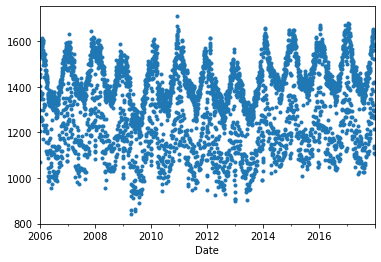

In [118]:
opsd_daily['Consumption'].plot(marker=".", linestyle="None")

<AxesSubplot:xlabel='Date'>

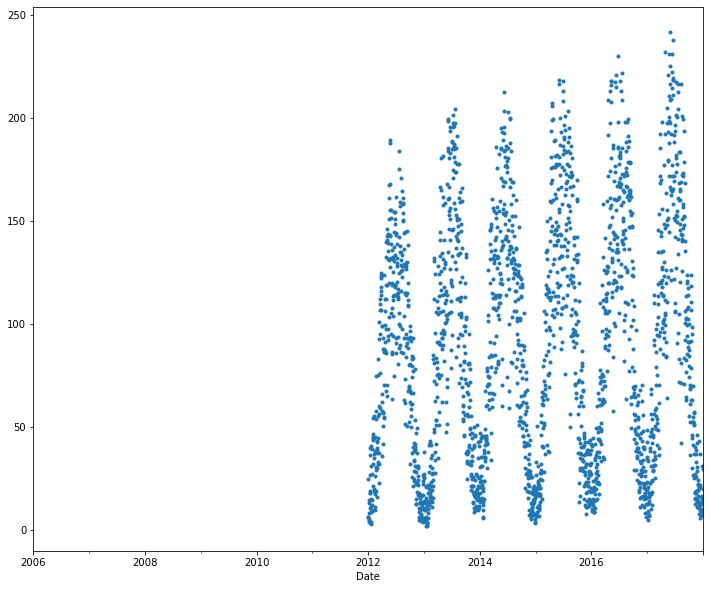

In [117]:
opsd_daily['Solar'].plot(marker=".", linestyle="None", figsize=(12,10))

<AxesSubplot:xlabel='Date'>

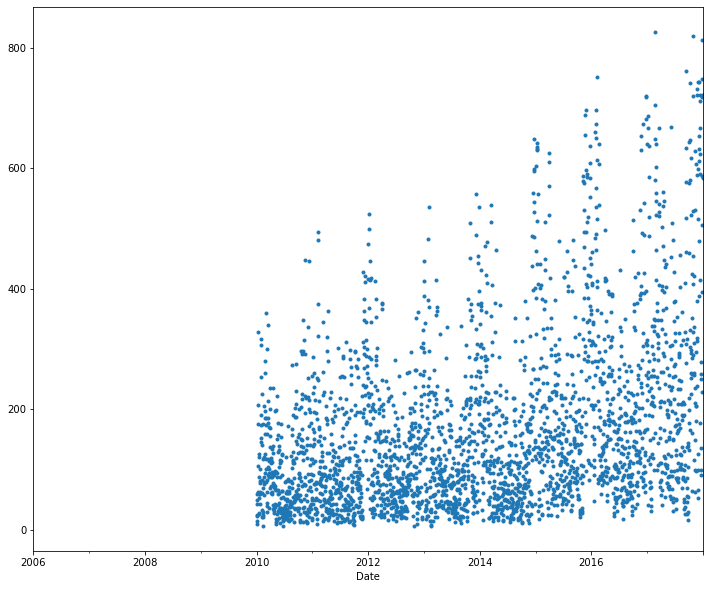

In [120]:
opsd_daily['Wind'].plot(marker=".", linestyle="None", figsize=(12,10))

<AxesSubplot:xlabel='Date'>

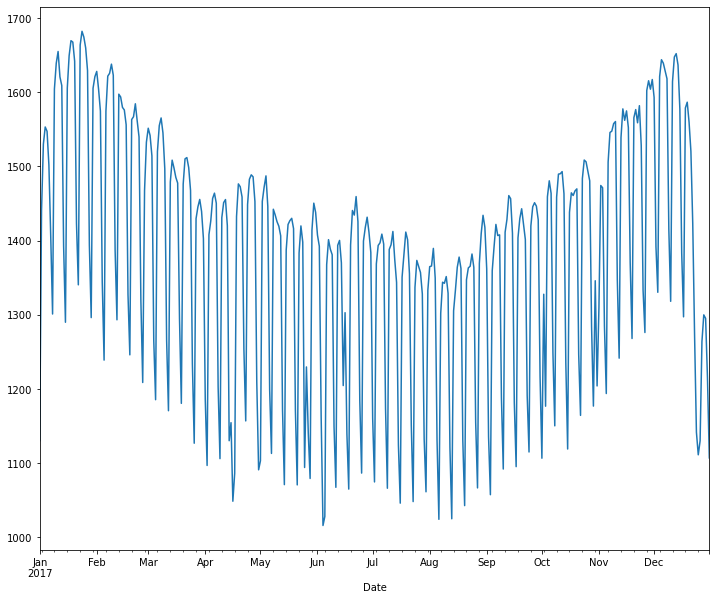

In [123]:
opsd_daily.loc['2017', 'Consumption'].plot(figsize=(12,10))

<AxesSubplot:xlabel='Date'>

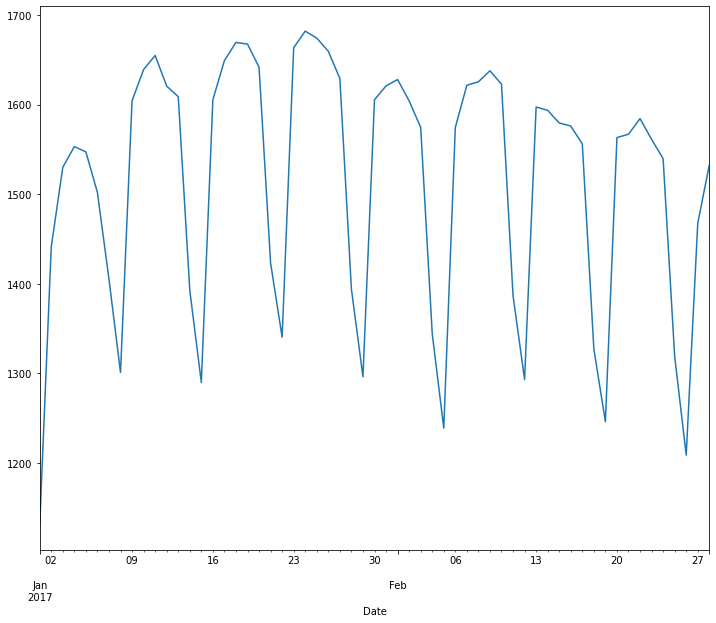

In [124]:
opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(figsize=(12,10))

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

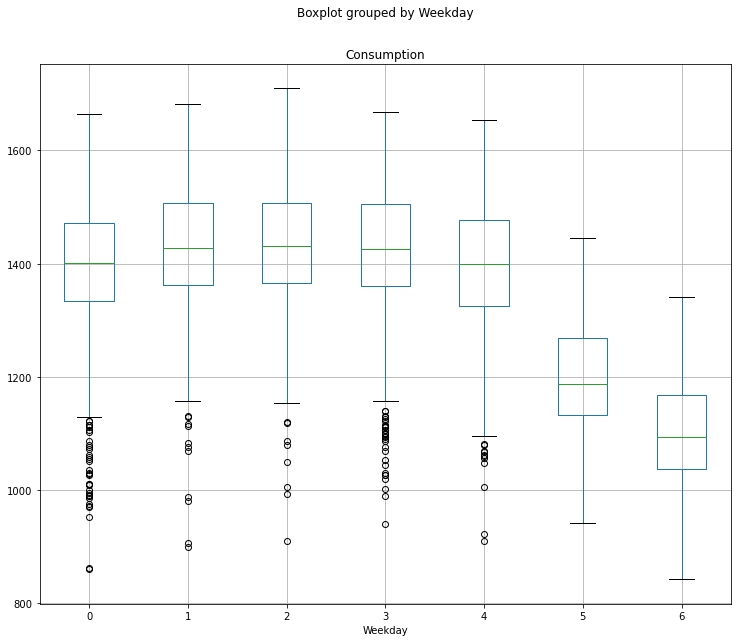

In [129]:
opsd_daily.boxplot(column="Consumption", by="Weekday", figsize=(12,10)) 

dari sini kita bisa menarik beberapa konklusi tentang
pemakaian listrik per hari tertentu per minggunya.

Selain itu, kita bisa pakai teknik resample untuk
melihat trend pemakaian listrik apakah naik dari
minggu ke minggu

In [130]:
data_columns = ['Consumption','Wind','Solar','Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [131]:
opsd_weekly_mean.shape

(627, 4)

In [132]:
opsd_daily.shape

(4383, 7)

<AxesSubplot:xlabel='Date'>

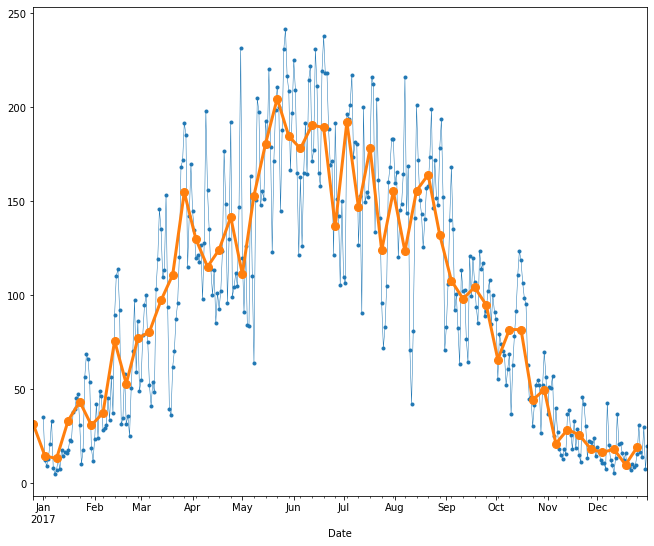

In [142]:
start, end = '2017-01', '2017-12'

opsd_daily.loc[start:end, 'Solar'].plot(marker=".", linestyle="-", linewidth="0.5", figsize=(11,9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker="o", markersize=8, linestyle="-", linewidth="3", figsize=(11,9))